# COGS 108 - Data Analysis of Instant Ramen Noodles

# Link to Video
https://youtu.be/MvB99MyyOcQ

# Permissions
Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).
- [X] YES - make available
- [] NO - keep private

# Overview
This project looks at the relationship between the ratings of ramen based on countries, continents and spice levels. While it primarily focuses on the ratings of each ramen and how spicy it was, we also examined the data through visuals for trends and evaluated one-sided trends using statistics to analyze our hypothesis. Although there is absent data among certain North American countries, our analysis acknowledges that those certain countries produce significantly less variety ramen than other North American countries.

# Names

- Maxwell Fang
- Long Le
- Huy Trinh
- Hasan Shaikh
- Mohammed Master

<a id='research_question'></a>
# Research Question

How does the spice level of instant ramen affect the star rating on the www.theramenrater.com in regards to preference across each country?

# Background & Prior Work
## Introduction
    
What is Instant Ramen? Instant Ramen is a staple food for college students and busy people throughout the world. People eat it for breakfast, lunch, dinner, and at any time of the day. Instant Ramen is a cheap option and consists of precooked noodles with some type of flavor powder. It is common around the world and each country has a favorite brand. Some famous brands are NongShim, Indomie, and Maruchan. 

This topic is very significant to our group because as college students we all have tried various types of noodles. We love food and want to share our love of food and combine it with data science. We have looked deep into our dataset and categorized it with brands, countries, and ratings. 

We are curious to see if the spice level of instant ramen can have an effect on the rating deepening in the different countries it is tried in. We know that some countries prefer spicy food so possibly the spicier instant ramens has a higher rating three, whilst countries that cannot tolerate much spice may have a greater rating for less spicier flavors. 

## Previous Work

Previous work done on this topic has mostly focused on the most popular flavors/varieties of ramen across the world with a large focus on the types of brands that are favorites along with data often being extracted from online reviews. The goal of these studies was to use machine learning to predict how certain varieties of ramen would prosper in certain regions while simultaneously analyzing the characteristics that make certain ramen better than others.

The "Exploring the World of Ramen through Text Analytics!" (1) uses NLP to find the recurring theme of the most popular ramen. We implemented a similar approach when we classify the spiciness of the instant ramen noodles. In our approach, we use a phrase of two words instead of having just one word n-gram like the project.

The "Exploratory Data Analysis with Ramen Ratings" (2) focuses on predicting whether or not a noodle is spicy and the country of origin. However, this is not our main concern because our project aims to find whether the difference in the average star rating is statistically significant.

## Citations and Links

- (1) https://towardsdatascience.com/exploring-the-world-of-ramen-through-text-analytics-1131280c4c6b
- (2) https://ghostleek.medium.com/exploratory-data-analysis-with-ramen-ratings-d4b9394b0acf


# Hypothesis
We believe that Asian countries have a higher average star rating for spicy instant ramen noodles than other countries on average. A large portion of ramen manufacturers in Asia produce spicy-flavored ramen; we believe that ratings for spicy ramen will be higher than those that are not spicy.

The alternative hypothesis is that Asian countries do not have a higher average star rating for spicy instant ramen noodles than other countries on average. This might be the case because dataset maker might have a preference for non-Asian noodles.

# Dataset


- Dataset Name: Top Ramen Ratings 2022
- Link to the dataset: https://www.kaggle.com/datasets/ankanhore545/top-ramen-ratings-2022
- Number of observations: 4120

The Top Ramen Ratings 2022 dataset is found on Kaggle. The dataset contains brand name, variety or ramen package name, style, country and stars. 

The dataset is the ratings for the ramen reviewed by the The Ramen Rater blog. The data includes the brand of the ramen, the name of the ramen, the packaging style, country of origin, and the star rating. The data is clean but not usable for our analysis in its original form.

# Setup

In [1]:
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from category_dict import spiciness_dict
import re

# map libraries
import geopandas as gpd
import folium
from folium.plugins import StripePattern

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [2]:
## YOUR CODE HERE
ramen = pd.read_csv('ramen_rating.csv')
ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,T
0,4120,MIT,Shallot Sauce Dry Noodle,Pack,Taiwan,3,NaN
1,4119,Sapporo Ichiban,Tonkotsu Ramen Japanese Style Noodles,Bowl,United States,4.5,NaN
2,4118,Binh Tay,Mi Kiwi,Bowl,Vietnam,3,NaN
3,4117,Charming Couple,Biang Biang Scallion Chicken Sauce,Pack,Taiwan,4.5,NaN
4,4116,immi,Tom Yum Shrimp Flavor Ramen Soup,Pack,United States,2.75,NaN


# Data Cleaning

First, we want to only keep the columns that are necessary for our analysis. Columns such as `Review #` and `T` are not needed for this analysis. Because of that reason, we are removing those columns from our analysis.

In [3]:
## YOUR CODE HERE
df = ramen.drop(columns=['T','Review #'])
df.head()

,Brand,Variety,Style,Country,Stars
0,MIT,Shallot Sauce Dry Noodle,Pack,Taiwan,3
1,Sapporo Ichiban,Tonkotsu Ramen Japanese Style Noodles,Bowl,United States,4.5
2,Binh Tay,Mi Kiwi,Bowl,Vietnam,3
3,Charming Couple,Biang Biang Scallion Chicken Sauce,Pack,Taiwan,4.5
4,immi,Tom Yum Shrimp Flavor Ramen Soup,Pack,United States,2.75


## Feature Engineering
We want to add the spiciness column from extracting the text from `Variety` column. First, we want to see if `mild`, `medium`, `spicy`, or `hot` is in the text itself. If any of those words is in the text, we would use the according spiciness scale to categorize the group.

In [4]:
spicy_levels = ['mild','medium','spicy','hot','fiery']
def spiciness(text):
    text= text.lower()
    for spice in spicy_levels:
        if spice in text:
            return spice
    return 'pepper free'

df['spiciness'] = df['Variety'].apply(spiciness)
df.head()

,Brand,Variety,Style,Country,Stars,spiciness
0,MIT,Shallot Sauce Dry Noodle,Pack,Taiwan,3,pepper free
1,Sapporo Ichiban,Tonkotsu Ramen Japanese Style Noodles,Bowl,United States,4.5,pepper free
2,Binh Tay,Mi Kiwi,Bowl,Vietnam,3,pepper free
3,Charming Couple,Biang Biang Scallion Chicken Sauce,Pack,Taiwan,4.5,pepper free
4,immi,Tom Yum Shrimp Flavor Ramen Soup,Pack,United States,2.75,pepper free


In [5]:
df.spiciness.value_counts()

pepper free    3523
spicy           446
hot             128
mild             21
fiery             2
Name: spiciness, dtype: int64

With this simple text extraction, we are able to correctly categorize almost 600 of these instant ramens. Next, we want to use the popular phrases in the variety text to manually categorize those phrases. Every phrase is made up from splitting up the string in the column `Variety` to pairs of words. Then, we loop through instant noodle name to count the occurence of these phrases.

In [6]:
# extracting spiciness from text
# cleaning the string from the Variety column
variety_list = (df['Variety'].str.lower()
                .str.replace('[^a-zA-Z]', ' ', regex=True)
                .str.replace(' +', ' ', regex=True).values)

# finding the most popular phrases to catagorize
pairs_dict = {}
for i in variety_list:
    words = i.split()
    for j in range(len(words) - 1):
        pair = words[j] + ' ' + words[j+1]
        if pair in pairs_dict:
            pairs_dict[pair] += 1
        else:
            pairs_dict[pair] = 1
            
# only take the popular phrase if it appears more than 10 times
popular_phrases = [(i, pairs_dict[i]) for i in pairs_dict if pairs_dict[i] > 10]
popular_phrases.sort(key=lambda x: x[1],reverse = True)
popular_phrases[:6] 

[('instant noodles', 298),
 ('noodle soup', 178),
 ('cup noodles', 161),
 ('instant noodle', 134),
 ('tom yum', 117),
 ('chicken flavor', 104)]

From these most used phrases, phrases such as `'instant noodles'` or `'noodle soup'` or `'cup noodles'` are not informative. Because of that reason, we cannot use these uninformative phrases to categorize the spiciness. On the other hand, we can use phrases like `'tom yum'` and `'chicken flavor'` to categorize their spiciness level. For example, `soy sauce` would be `mild`, and `tom yum` would be `hot`. We include our categorization in the `category_dict.py` file in the same directory as this Jupyter Notebook.

Then, we loop through the every row to find if the `Variety` column contains any of the pairs that we previously categorized. If the phrase exists in its packaging name, we categorize it with its appropriate spiciness according to the `category_dict.py`. 

In the end, we decided to merge `mild` and `medium` together since the Scoville units were relatively close to each other. Similarly, we decided to merge `hot` and `fiery` since the value counts for `fiery` were extremely low. 

In [7]:
spicy_levels = ['mild','spicy','hot']
def spiciness(text):
    # catch if the spciniess is directly in the text
    text = re.sub('r[^a-zA-Z]', ' ', text.lower())
    text = re.sub(' +', ' ', text)
    for spice in spicy_levels:
        if spice in text:
            return spice
    
    # catch if the spiciness is implied in the text 
    words = text.split()
    for j in range(len(words) - 1):
        pair = words[j] + ' ' + words[j+1]
        if pair in spiciness_dict:
            return spiciness_dict[pair]
    return 'pepper free'


df['Spiciness'] = df['Variety'].apply(spiciness)
df['Spiciness'].value_counts()

pepper free    2834
mild            526
spicy           446
hot             314
Name: Spiciness, dtype: int64

After using engineering the feature using this process, we are able to categorize up to almost 1300 noodles. In this case we followed the levels from the Scoville unit which is a unit of pungency.  

In [8]:
#0 is non-pepper, 
#(100, 2500) is mild
#(2500, 10000) is spicy
#(10000, 50000) is hot
#units: Scoville heat units
scoville_levels = [0, (100, 2500), (2500, 10000), (10000, 50000)]

def calc_scoville_level(level):
    if level == 'pepper free':
        return scoville_levels[0]
    elif level == 'mild':
        return scoville_levels[1]
    elif level == 'spicy':
        return scoville_levels[2]
    else:
        return scoville_levels[3]
    
df['Scoville'] = df['Spiciness'].apply(calc_scoville_level)
df['Scoville'].value_counts()

0                 2834
(100, 2500)        526
(2500, 10000)      446
(10000, 50000)     314
Name: Scoville, dtype: int64

## Separate by Region

We use the website 'https://worldpopulationreview.com/country-rankings/list-of-countries-by-continent' to categorize the countries into their appropriate continent. We need this region information for choropleth visualization.

We brought in a new dataset from the url above to respectfully separate each country with its continents. We did this so we can create a new column in the dataframe. Because there is already a country column, we are able to group the countries in a larger region known as "continents".

In [9]:
continent = pd.read_csv('country_by_continent.csv')
continent['country'] = continent['country'].str.lower().str.replace(' ','')
df['country'] =  df['Country'].str.lower().str.replace(' ','')
continent.sample(5)

,country,continent
95,srilanka,Asia
101,turkey,Asia
224,colombia,South America
125,guernsey,Europe
90,philippines,Asia


Now, we want to use the information above to include the continent column in our original DataFrame.

In [10]:
new_df = pd.merge(df, continent, on="country")
new_df = new_df.drop(columns=['country'])
new_df.sample(5)

,Brand,Variety,Style,Country,Stars,spiciness,Spiciness,Scoville,continent
2079,Sakurai Foods,ARCHE Naturküche Ramen Mit Ingwer,Pack,Japan,3.25,pepper free,pepper free,0,Asia
985,Thien Huong Food,Lemon Chicken Flavor Instant Noodles,Pack,Vietnam,3.5,pepper free,pepper free,0,Asia
371,Unif,Shrimp Fish,Bowl,Taiwan,3.75,pepper free,pepper free,0,Asia
726,Nissin,Chow Mein Premium Savory Sauce And Restaurant ...,Tray,United States,4.25,pepper free,mild,"(100, 2500)",North America
3295,Sau Tao,Laksa Flavour Trolley Noodles,Bowl,Hong Kong,5,pepper free,pepper free,0,Asia


Below is the number of times each ramen is reviewed from each continent.

In [11]:
new_df.continent.value_counts()

Asia             3192
North America     658
Europe            109
South America      34
Oceania            30
Africa              4
Name: continent, dtype: int64

The `Stars` column is not in a numerical column for us to do analysis on. Becasue of this reason, we want to clean the `Stars` column into a number on a scale from `1` to `5` with the increment of `0.25`.

In [12]:
star_values = ['1', '1.25', '1.5', '1.75', '2', '2.25', '2.5', '2.75', '3', '3.25', '3.5', '3.75', '4', '4.25', 
                   '4.5', '4.75', '5']
new_df = new_df[new_df.Stars.isin(star_values) == True]

def star_converted(s):
  rating = s.split('/')[0]
  try:
      return float(rating)
  except ValueError:
      return None

new_df.Stars= new_df.Stars.apply(star_converted)
star_count = new_df['Stars'].value_counts()
star_count
new_df.sample(5)

,Brand,Variety,Style,Country,Stars,spiciness,Spiciness,Scoville,continent
3734,Koka,Oriental Style Instant Noodles Tom Yam Flavour,Pack,Singapore,2.5,pepper free,hot,"(10000, 50000)",Asia
3432,Kailo,Chicken,Pack,Hong Kong,3.5,pepper free,pepper free,0,Asia
869,Nissin,Big Cup Noodles Spicy Chicken,Cup,United States,3.5,spicy,spicy,"(2500, 10000)",North America
469,Muso,Organic Ramen Shoyu,Pack,United States,4.0,pepper free,pepper free,0,North America
1474,Maruchan,Kuroi Buta Curry,Cup,Japan,2.5,pepper free,pepper free,0,Asia


# Data Visualization
We want to visualize the distribution of our data, namely the `Stars` and `Spiciness` separated by `continent` and `Country`. First, we want to see the average `Stars` rating by `continent`.

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

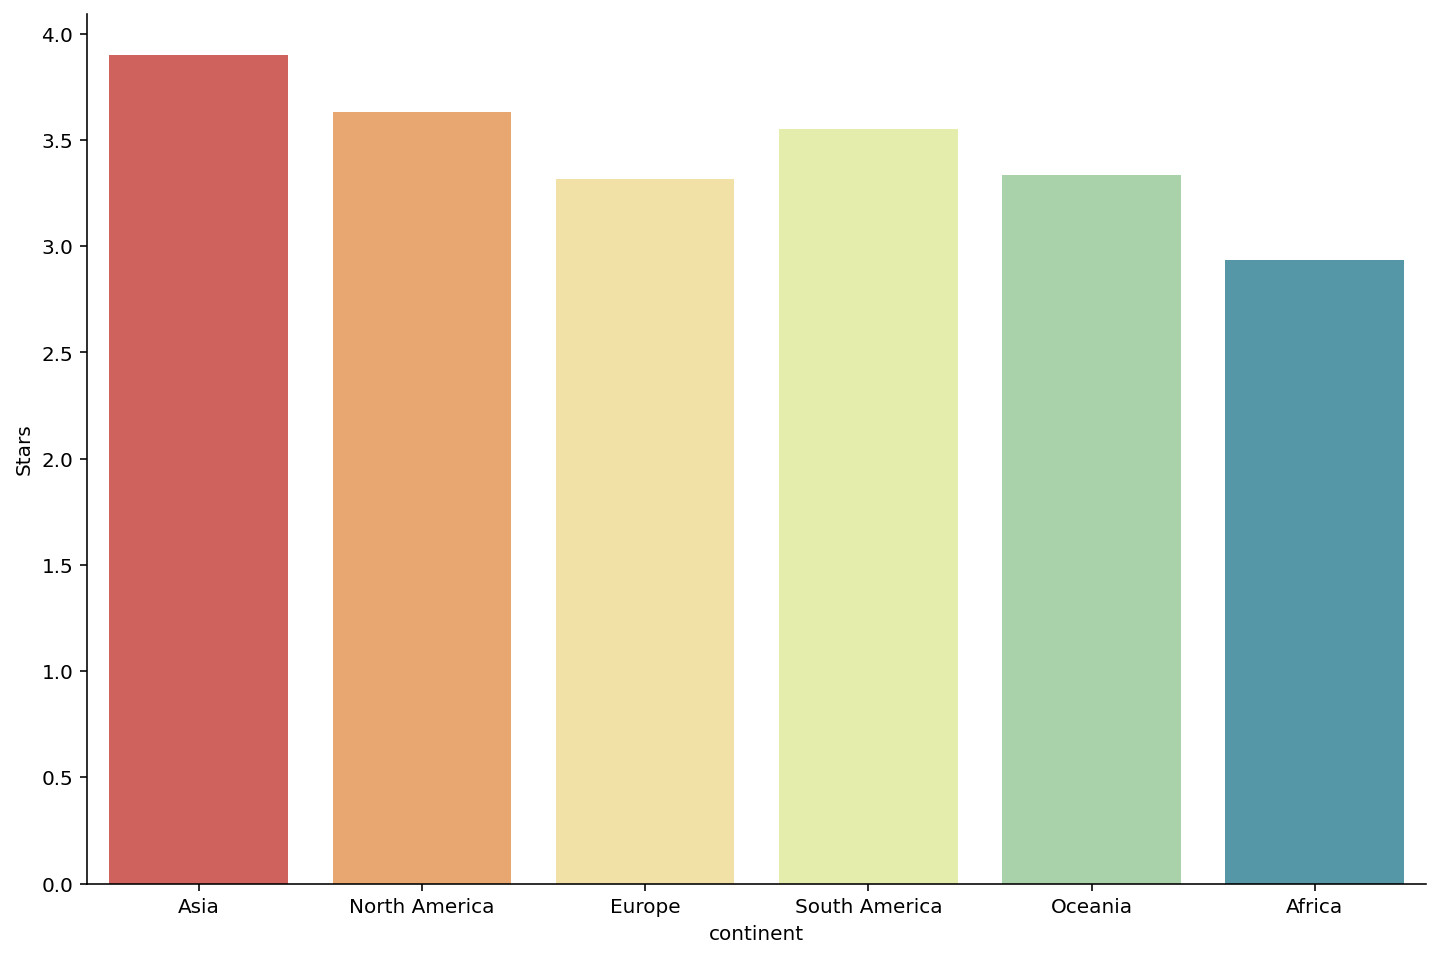

In [13]:
plt.figure(figsize = (12, 8))

barplot_continent_stars = sns.barplot(y = 'Stars', x = 'continent', data = new_df, palette = 'Spectral', ci= None)

# remove the top and right lines
sns.despine()

#labeling the bars
barplot_continent_stars.bar_label(barplot_continent_stars.containers[0])

# add title and axis labels (modify x-axis label)
barplot_continent_stars.set_title('Ratings for each Continent')
barplot_continent_stars.set_ylabel('Stars')
barplot_continent_stars.set_xlabel('Continent');

We can visually see that ramen noodles from the Asian continent tend to have higher `Stars` ratings than that of the other continents. 

We wonder if the spiciness of Asian ramen noodles has to do with this higher rating. Now, we want to see the average star ratings by spiciness.

In [ ]:
plt.figure(figsize = (12, 8))

barplot_stars_rating = sns.barplot(data = new_df, y = 'Stars', x='Spiciness', palette = 'YlOrBr', ci= None)

# remove the top and right lines
sns.despine()

#labeling the bars
barplot_stars_rating.bar_label(barplot_stars_rating.containers[0])

# add title and axis labels (modify x-axis label)
barplot_stars_rating.set_title('Stars vs Spiciness')
barplot_stars_rating.set_ylabel('Stars')
barplot_stars_rating.set_xlabel('Spiciness');

Based on this barplot, ramen noodles labeled as `hot` tend to have the highest rating compared to other spiciness categories. Now, we want to see if the higher ratings in the Asia noodles have to do with the fact that Asian noodles are more likely to be labeled as `hot`.

In [ ]:
plt.figure(figsize = (15, 8))

barplot_continent_stars_spiciness_2 = sns.barplot(data = new_df, x = 'Stars', y = 'continent', hue = 'Spiciness', palette = 'YlOrBr', ci = None)

# remove the top and right lines
sns.despine()

#labeling bars
for container in barplot_continent_stars_spiciness_2.containers:
    barplot_continent_stars_spiciness_2.bar_label(container)
    
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# add title and axis labels (modify x-axis label)
barplot_continent_stars_spiciness_2.set_title('Spice Level Ratings for every Continent ')
barplot_continent_stars_spiciness_2.set_xlabel('Stars')
barplot_continent_stars_spiciness_2.set_ylabel('Continent');


From the plot above, we can see that `hot` noodles generally have higher star ratings regardless of what continent they are from (with the exclusion of Africa and South America because there is no data). Generally, Asian noodles just have higher ratings relative to other continents. 

We want to take a closer look at the count of noodles in Asia categorized by their spiciness.

In [ ]:
asian_countries = new_df[new_df['continent'] == 'Asia']
asian_countries.sample(5)

plt.figure(figsize = (18, 8))

asian_countries_count = sns.countplot(x = 'Country', hue='Spiciness', data = asian_countries, palette = 'YlOrBr')

# remove the top and right lines
sns.despine()

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#labels for bars
for container in asian_countries_count.containers:
    asian_countries_count.bar_label(container)

# add title and axis labels (modify x-axis label)
asian_countries_count.set_title('Number of Ramen in Asia')
asian_countries_count.set_ylabel('Country')
asian_countries_count.set_xlabel('Ramen');

Based on this count plot, we can see that the majority of ramen noodles are from `Japan`, `South Korea`, and `Taiwan`. Most of those countries either have `pepper free` spiciness. 

Now, we want to see average star ratings for each spiciness level categorized by country.

In [ ]:
plt.figure(figsize = (20, 8))

barplot_stars_rating_per_country_na = sns.barplot(data = asian_countries, y = 'Stars', x='Country', hue = 'Spiciness', palette = 'YlOrBr', ci = None)

# remove the top and right lines
sns.despine()

#labels for bars
#for container in barplot_stars_rating_per_country_na.containers:
    #barplot_stars_rating_per_country_na.bar_label(container)

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# add title and axis labels (modify x-axis label)
barplot_stars_rating_per_country_na.set_title('Ratings for Ramen in Asia')
barplot_stars_rating_per_country_na.set_xlabel('Country')
barplot_stars_rating_per_country_na.set_ylabel('Stars');

We observe a general trend of higher star ratings for noodles labeled as `hot` and `spicy` compared to `pepper free` or `mild` in Asian countries.

In [ ]:
new_df['continent'].value_counts()

We want to repeat a similar approach but for North American countries.

In [ ]:
na_countries = new_df[new_df['continent'] == 'North America']
na_countries

plt.figure(figsize = (15, 7))

na_countries_count = sns.countplot(x = 'Country', hue='Spiciness', data = na_countries, palette = 'YlOrBr', 
                                   hue_order = ['pepper free', 'mild', 'hot', 'spicy'])

# remove the top and right lines
sns.despine()

#labels for bars
for container in na_countries_count.containers:
    na_countries_count.bar_label(container)

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# add title and axis labels (modify x-axis label)
na_countries_count.set_title('Number of Ramen from each country in North America')
na_countries_count.set_xlabel('Country')
na_countries_count.set_ylabel('Ramen');

We can see that most of the noodles produced by a North American ramen manufacturers is the `pepper free` ramen. Besides, the U.S. produces a significantly larger amount of ramen noodles compared to Mexico and Canada.

In [ ]:
plt.figure(figsize = (15, 7))

barplot_stars_rating_per_country_na = sns.barplot(data = na_countries, y = 'Stars', x='Country', hue = 'Spiciness', palette = 'YlOrBr', 
                                   hue_order = ['pepper free', 'mild', 'hot', 'spicy'], ci = None)

# remove the top and right lines
sns.despine()

#labels for bars
for container in barplot_stars_rating_per_country_na.containers:
    barplot_stars_rating_per_country_na.bar_label(container)

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# add title and axis labels (modify x-axis label)
barplot_stars_rating_per_country_na.set_title('Ratings for Ramen in North America')
barplot_stars_rating_per_country_na.set_xlabel('Country')
barplot_stars_rating_per_country_na.set_ylabel('Stars');

Unlike the higher star ratings for the spicier ramen in Asia, North American ramen has higher star ratings for more mild ramen (with some missing data in Mexico and Canada).

## Create a map for average star rating
In this part, our group wants to visualize the average star ratings by geographic location to see if there exists any trend between nearby countries.

In [14]:
file = 'ramen.csv'
df = pd.read_csv(file)
# df.astype({'Stars': 'float'})
def star_converted(s):
    rating = s.split('/')[0]
    try:
        return float(rating)
    except ValueError:
        return None
df.Stars= df.Stars.apply(star_converted)

In [15]:
star_df = df.groupby('Country').mean().reset_index()
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
country_shapes = f'{url}/world-countries.json'
geoJSON_df = gpd.read_file(country_shapes)
geoJSON_df = geoJSON_df.rename(columns = {"id":"country_code",'name':'Country'})

geoJSON_df['country'] = geoJSON_df['Country'].str.lower().str.replace(' ','')
star_df = star_df.rename(columns = {"Country":"Country_star"})

star_df['country'] =  star_df['Country_star'].str.lower().str.replace(' ','')


final_df = geoJSON_df.merge(star_df, on = "country")

In [16]:
star_df[~star_df['Country_star'].isin(final_df.Country_star.unique())]

,Country_star,Stars,country
13,Hong Kong,3.880488,hongkong
34,Serbia,2.300000,serbia
35,Singapore,4.109375,singapore
43,United States,3.588533,unitedstates


In [17]:
def specific_country(country):
    '''
    convert our df Country columns that have certain countries found differently in folium
    Singapore and Hong Kong do not exist in folium so we will ignore it as they are also small to notice    
    '''
    check_country = country.lower().replace(' ','')
    if 'serbia' in check_country:
        return 'Republic of Serbia'
    elif 'unitedstates' in check_country:
        return 'United States of America'
    return country

In [18]:
star_df = df.groupby('Country').mean().reset_index()
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
country_shapes = f'{url}/world-countries.json'
geoJSON_df = gpd.read_file(country_shapes)
geoJSON_df = geoJSON_df.rename(columns = {"id":"country_code",'name':'Country'})
star_df['Country'] = star_df['Country'].apply(specific_country)

geoJSON_df['country'] = geoJSON_df['Country'].str.lower().str.replace(' ','')
star_df = star_df.rename(columns = {"Country":"Country_star"})

star_df['country'] =  star_df['Country_star'].str.lower().str.replace(' ','')


final_df = geoJSON_df.merge(star_df, on = "country")
def get_lat_long(pt):
    '''
    Get centroid point of a state
    '''
    return (pt.y, pt.x)
final_df['coor'] = final_df['geometry'].centroid.apply(get_lat_long)
m = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=country_shapes,
    name='Ramen World',
    data=final_df,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['Country', 'Stars'],
    key_on='feature.properties.name',
    fill_color='PuRd',
).add_to(m)

sp = StripePattern(angle=45, color='grey', space_color='white')

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

# # Add hover functionality.
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    data = final_df,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['Country','Stars',],
        aliases=['Country','Star rating',],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
m.add_child(NIL)
m.keep_in_front(NIL)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Water Color').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('cartodbdark_matter').add_to(m)
folium.LayerControl(collapsed=True).add_to(m)
m

<ipython-input-18-dd45faa50ccc>:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  final_df['coor'] = final_df['geometry'].centroid.apply(get_lat_long)


Based on our encoding, the darker color signifies a higher average star rating. Lighter shade of pink shows a lower average star rating.

According to our choropleth, most of the countries closer to the equator have higher average star ratings than the countries closer to the poles. Moreover, nearby countries tend to have similar average star ratings.

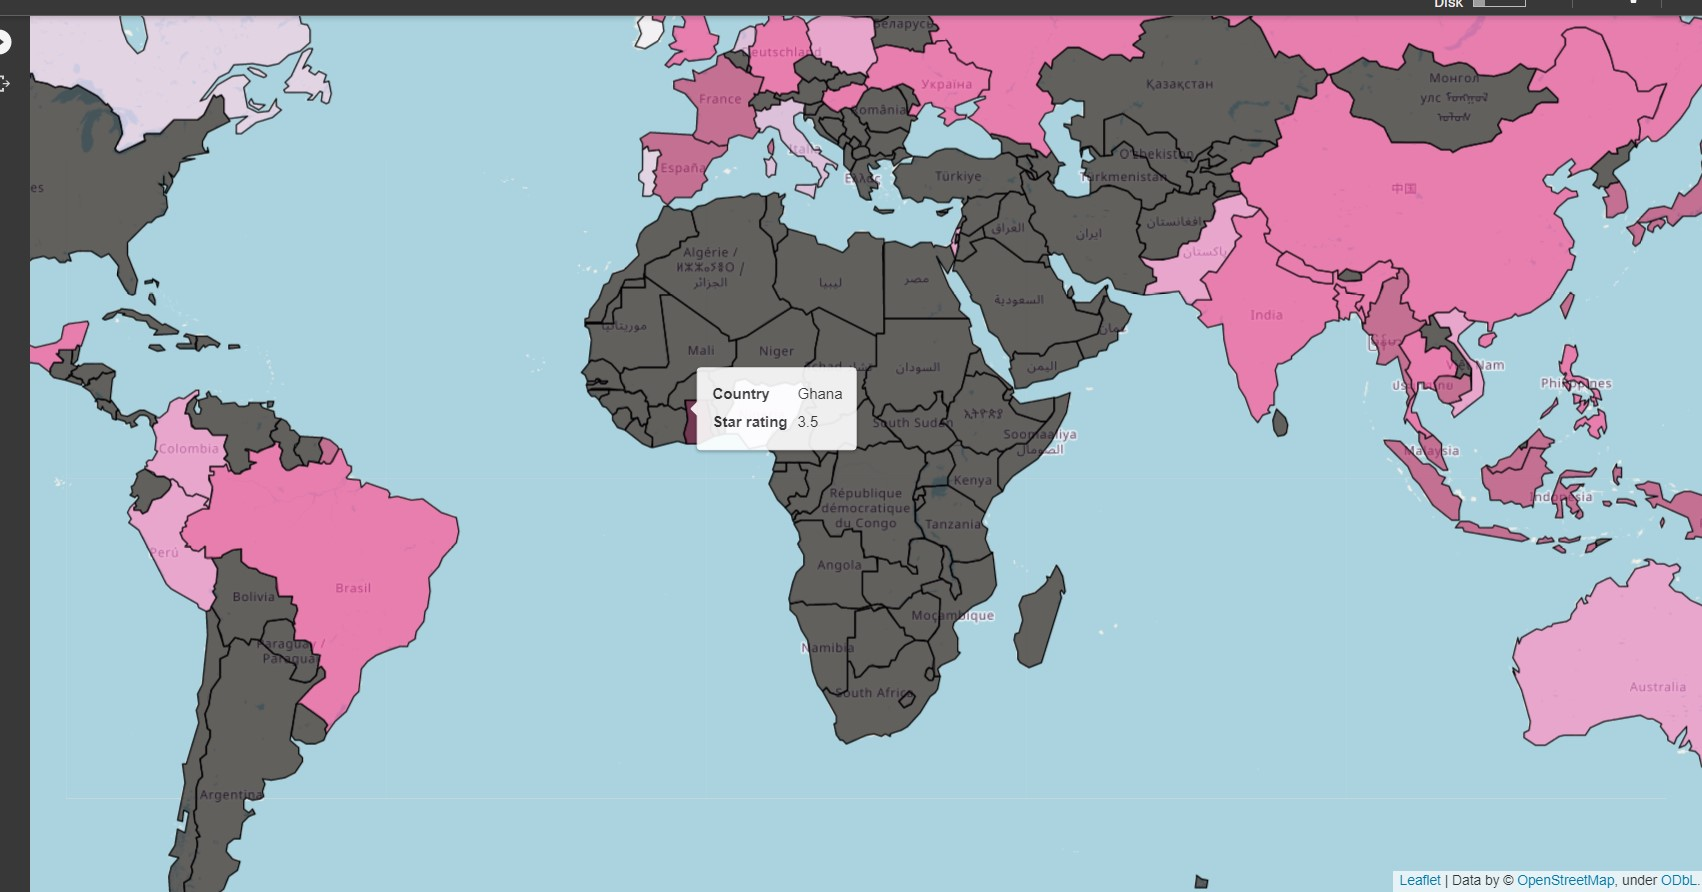

In [19]:
from IPython.display import Image
Image(filename='pictures/ghana.jpg') 

We can also change the layer of the map to be aesthetic

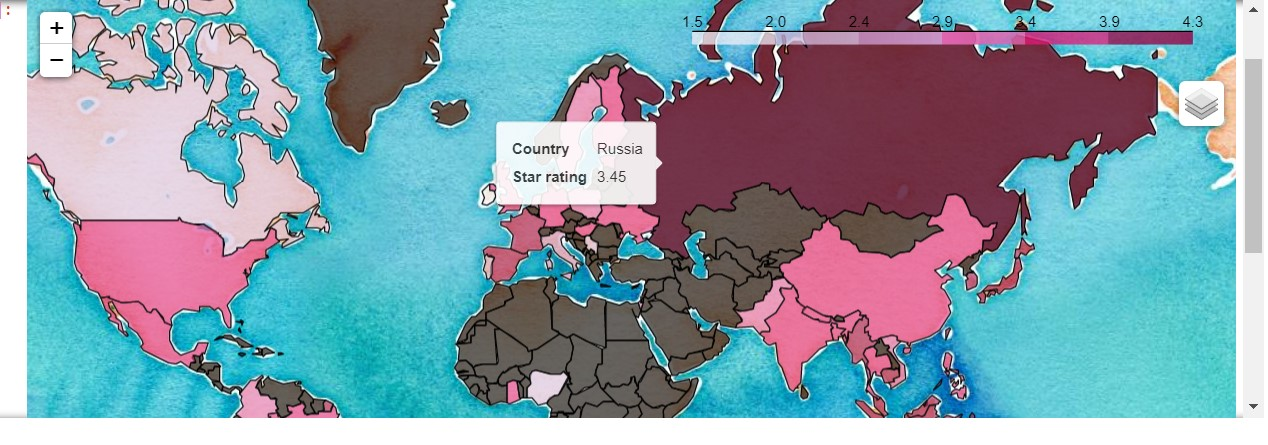

In [20]:
Image(filename='pictures/russia.jpg') 

# Data Analysis & Results
## One-tailed t test to test if the Asian countries have higher ratings
Above, we can see a general visual trend of Asian countries having ratings. However, we want to use a t test to check if the difference we see is statistically significant.
$$H_0: \text{Asian instant ramen tested have similar average ratings than to non-Asian instant ramen tested}$$
$$H_a: \text{Asian instant ramen tested have higher average ratings than to non-Asian instant ramen tested}$$

In [21]:
ratings_continent = new_df[['continent', 'Stars']].reset_index(drop=True)
ratings_continent['continent'] = ratings_continent['continent'].apply(lambda x: 'Asia' if x == 'Asia' else 'Non-Asia')
ratings_continent.sample(5)

,continent,Stars
3561,Asia,4.25
514,Non-Asia,4.50
3341,Asia,4.50
2210,Asia,5.00
2330,Asia,5.00


First, we need to find the observed test statistics.

In [24]:
ratings_continent.groupby('continent')['Stars'].mean()

continent
Asia        3.898857
Non-Asia    3.572917
Name: Stars, dtype: float64

In [22]:
avg_ratings = ratings_continent.groupby('continent')['Stars'].mean()
observed_difference = avg_ratings['Asia'] - avg_ratings['Non-Asia']
observed_difference

0.3259407520652293

We observe `0.326` star higher between the Asian instant ramen tested and the non-Asian instant ramen tested. Now we want to run a one-tailed t test to see if this difference is statistically significant.

In [98]:
greater_than_observed = []

for _ in range(1_000):
    ratings_continent['shuffled'] = ratings_continent['Stars'].sample(n=len(ratings_continent)).reset_index(drop=True)
    grouped_avg = ratings_continent.groupby('continent')['shuffled'].mean()
    sample_test_statistic = grouped_avg['Asia'] - grouped_avg['Non-Asia']
    greater_than_observed.append(sample_test_statistic > observed_difference)
    
p_val = np.array(greater_than_observed).mean()
print('P-value to observe the difference at least as large as the observed test statistics is', round(p_val, 4))

P-value to observe the difference at least as large as the observed test statistics is 0.0


## Result for Hypothesis test by Continent
We can see from 1000 random sample, we get a p-value of 0.0. Meaning that the observed higher star ratings of Asian instant ramen tested compared to non-Asian instant ramen tested is statistically significant (regardless of the $\alpha$ value that we choose).

We reject the null hypothesis. We find evidence in support of the alternative hypothesis that Asian instant ramen tested have the same higher average ratings than to non-Asian instant ramen tested.

## Spiciness and Star Ratings

Below is the table of the average star ratings by the spiciness level

In [31]:
# average star ratings by spiciness category
new_df[['spiciness', 'Stars']].groupby('spiciness')['Stars'].mean().to_frame()

,Stars
spiciness,
fiery,4.000000
hot,3.898305
mild,3.680556
pepper free,3.829505
spicy,3.844548


We can see that a general trend of spicier instant noodles tend to have higher average star ratings. Now, we want to see if this deviation from the average star ratings of all noodles is statistically significant.
$$H_0: \text{Spicier instant ramen tested have similar average ratings than to less spicy instant ramen tested}$$
$$H_a: \text{Spicier instant ramen tested have higher average ratings than to less spicy instant ramen tested}$$

First, we want to find the observed test statistics by calculating the sum of absolute deviation from the average star rating.

In [56]:
spicy_star = new_df[['spiciness', 'Stars']].reset_index(drop=True)
avg_star = spicy_star['Stars'].mean()
obs = (spicy_star.groupby('spiciness')['Stars'].mean() - avg_star).abs().sum()
print('The sum of absolute deviation from the average star rating is: ', round(obs, 4))

The sum of absolute deviation from the average star rating is:  0.4001


Now, we want to run a hypothesis test to see if this observed deviation from the average star rating is obtainable by chance.

In [100]:
greater_than_obs = []

for _ in range(1_000):
    spicy_star['shuffled'] = spicy_star['Stars'].sample(n=len(spicy_star)).reset_index(drop=True)
    test = (spicy_star.groupby('spiciness')['shuffled'].mean() - avg_star).abs().sum()
    greater_than_obs.append(test > obs)
    
p_val = np.mean(greater_than_obs)
print('P-value to observe the difference at least as large as the observed test statistics is', round(p_val, 4))

P-value to observe the difference at least as large as the observed test statistics is 0.813


## Result for Result for Hypothesis test by Spiciness
We get a very large p-value (greater than 0.80). This means that we obtain deviation of in the star ratings for spicier noodles at least as large as the observed test statistic more than 80% of the times. The observed difference in deviation from the average star ratings of all noodles is NOT statistically significant.

We fail to reject the null hypothesis. We do not find evidence in support of the alternative hypothesis spicier instant ramen tested have higher average ratings than to less spicy instant ramen tested.

# Ethics & Privacy
## Ethics
One of the largest problems is bias for the creation of ramen ratings. Considering the data was gathered from the Ramen Rater, there is only one person who conducted reviews for 4000+ ramen. This indicates that the data will be biased, so the findings for our research cannot be generalized to represent the opinions of others around the world. Many people like spicy ramen and many do not. Depending on what culture people live in, people will be accustomed to different tastes. For example, people in Sichuan love spicy food. However, places like Guangzhou might not like it as much. Therefore, the ratings will not be representative of the whole world, but the focus of the project is not to determine the accuracy of ratings.

Ramen companies all have different levels of spice and flavors. There is no standard level of spice for their ramen packets. Thus, there is not a right way to quantify or compare the true spice level of one ramen from another. The only way we can categorize the data is to deduct spice levels by extracting words from the title of the ramen. We could gather more accurate information if we were to look or analyze the ramen in greater detail. However, considering there are thousands of ramen, we cannot possibly gather all the information by hand but work with the limited resources that we have. If we have possibly more time to work on this project, we could have made an API that can help scrape data from the internet, but this of course is not necessarily possible in the short time frame that we have. It is important to note that we are not determining how accurate spice levels are for each ramen producer. We are only finding a trend of spicy ramen being rated higher with the data from the Ramen Rater. 

Companies outside of the United States, who do not use email as their primary method of communication, may be overrepresented and/or underrepresented. The shipment of instant ramen samples to the United States may be more difficult for companies that are outside of the U.S. compared to companies with factories/distributing facilities located within the U.S. Unlike other research questions, ours is primarily concerned with a specific characteristic (spiciness) of instant ramen, so we do not need to anonymize the identity of the noodles. Our data analysis will make use of all the attributes of the dataset. The Kaggle dataset is publicly available for us to use for EDA and we can see that its terms of use are publicly available.

The website owner of the ‘Ramen Rater’, Hans Lienesch, gathered his information by contacting different instant ramen companies by email and asked for their sample through mail. Because of this way of obtaining the sample noodle, some companies that do not use email as their main method of communication or companies outside of the United States find it more difficult to have their products sent to this reviewer. Besides, he also obtains his instant ramen noodles for review from buying the instant ramen noodles from his local grocery store. Because of this, the instant ramen noodles in the dataset is a biased sample of the noodles that are available in his area. Besides, the review (Hans Lienesch) might also miss instant ramen companies that have a small representation in the United States. Because of this, he might not contact those companies all together.

Since the sample of data we are implementing is biased, we cannot generalize to infer any causal relationship. We can only generalize our findings to the instant ramen samples that Lienesch received.

The metric we are using to answer our research question is using categorical data. Categorical data might not be the best option and quantitative data might be better. However, quantitative data might not be useful since we are unable to gather something like the exact Scoville level of each ramen pack. As mentioned before, we would need to scrape data and information on the exact Scoville level may not be available on the internet. With categorical data, our accuracy is not necessarily quantifiable but it can be somewhat trustworthy. Titles like ‘spicy’ or ‘hot’ are most likely not misleading and can be put on the higher end of spiciness levels. Rather overestimating or underestimating through numbers, we put the ramen into separate categories. One important note is that each category does not have a specific range of spiciness. For example, the non-pepper may not be 0 Scoville. Medium level may not be between a certain range (e.g. 5,000 - 10,000). We did not quantify the level of spiciness for we could not have found the exact level and range of each ramen product.

## Privacy
When we look at our data, especially for the maps and visualizations that we made indicating the ramen’s ratings and spice levels. We can see many countries do not have any color. We cannot assume that no ramen is produced there or the ratings are just zero. Since the data is only from Lienesch’s reviews, he might not have covered many other ramen products or gathered the ratings for that product. In addition, it is important to note that if something is labeled as very hot or spicy, then it can cause people to misinterpret it because everyone has different tastes, and it might not actually seem as spicy as it tastes. It is especially important to remember that these ratings are not fixed; they can easily cause debate and disputes in regards to the people’s tastes around the world.


# Conclusion & Discussion
## Conclusion
Our original hypothesis was that instant ramen from Asian countries tend to have higher star ratings compared to instant ramen from non-Asian countries. Besides, we also hypothesize that spicier instant ramen noodles tend to have higher star ratings than less-spicy ramen noodles.

Visually from the choropleth, we can see that instant ramen from Asian countries tend to have higher star ratings. Besides, the average star rating seems to be higher for spicier noodles according to the bar plots above.

Statistically, the tested instant ramen from Asia has a higher average star ratings compared to the tested instant ramen from other continents. Regarding the spiciness, the observed correlation in the bar plot for the spicier noodles having higher average star ratings is not statistically significant. Spicier noodles do not have higher average star ratings.

## Discussion and Limitation
The dataset is composed by one single individual with their own biases. The trend that observed in the EDA might just reflect his own preference for a certain spice level and variety. We cannot generalize this conclusion to all the instant ramen noodles that are available since the sampled data is not random due to convenience sampling bias.

Some limitations of the data provided excluded data from certain countries which somewhat hindered the trend analysis of certain regions as a whole. Despite this, there was a considerable amount of data from each region as a whole so trends were relevant and able to be observed.

# Team Contributions
- **As a group**: We chose the dataset and completed the write up proposal together as a group. Besides, we also completed the Background Information and the Conclusion together.

Individual contributions:
- Maxwell Fang: Added Scoville levels in data cleaning, created visuals for ramen count and ratings, and writeup for ethics.

- Long Le: I helped with the second part of the categorization of the keyword phrases to better catergorize the `pepper free` ramen noodles. Completed the Data Analysis and Results by adding the hypothesis tests and the results.

- Mohammed Master: Worked on the background and prior work section, exploratory data analysis, overview section, and the final video.

- Hasan Shaikh: Gave idea for research question, proposal, quantification of spice levels, and the qualitative levels of spice levels. Created EDA visualizations, helped clean data specifically for the EDA visualizations, and feature engineered our dataset.

- Huy Trinh: Elaborated on the information we found from the dataset for data wrangling. Built the geomap using the `folium` library. Helped with privacy part.